In [2]:
import pymysql
import json
import os
import networkx as nx
import freeman as fm
from unidecode import unidecode

def run_db_query(connection, query, args=None):
    with connection.cursor() as cursor:
        print('Executando query:')
        cursor.execute(query, args)
        for result in cursor:
            print(result)
            
with open('config_tests.json', 'r') as f:
    config = json.load(f)

conn = pymysql.connect(
    host=config['HOST'],
    user=config['USER'],
    password=config['PASS'],
    database='imdb'
)

In [59]:
with open('twomode1.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 1\n')

        #under5 = {}
        #movie_keys = {}
        #counter = 0
        movie_ids = []
        
        cursor.execute("SELECT id_filme, title FROM filme ")
        res = cursor.fetchall()

        for i in res:
            #under5[i[0]] = 0
            file.write('  node [\n')
            file.write('    id "f_{}"\n'.format(i[0]))
            file.write('    type "filme"\n')
            file.write('    label "{}"\n'.format(unidecode(i[1])))
            file.write('  ]\n')
            movie_ids.append(i[0])

        cursor.execute("SELECT id_keyword, nome FROM keyword")
        res = cursor.fetchall()
        #doit = 0

        for i in res:
#             cursor.execute("SELECT id_filme FROM filme_keyword WHERE id_keyword = %s", i[0])
#             movies = cursor.fetchall()

#             for movie in movies:
#                 if (under5[movie[0]] < 10):
#                     under5[movie[0]] += 1
#                     if(movie[0] in movie_keys):
#                         movie_keys[movie[0]].append(i[0])
#                     else:
#                         movie_keys[movie[0]] = [i[0]]
#                     doit = 1

            #if(doit==1):
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i[0]))
            file.write('    type "keyword"\n')
            file.write('    label "{}"\n'.format(unidecode(i[1])))
            file.write('  ]\n')

            #doit = 0

        for filme in movie_ids:
            cursor.execute("SELECT id_keyword FROM filme_keyword WHERE id_filme = %s", filme)
            key = cursor.fetchone()
            
            if(key is not None):
                #if (key in movie_keys[filme]):
                file.write('  edge [\n')
                file.write('    source "f_{}"\n'.format(filme))
                file.write('    target "k_{}"\n'.format(key[0]))
                file.write('  ]\n')

        file.write(']\n')

In [60]:
g1 = fm.load('twomode1.gml')
g1.set_all_nodes('size', 5)
g1.set_all_nodes('labpos', 'hover')
g1.move('bipartite', [n for n in g1.nodes if g1.nodes[n]['type'] == 'filme'])
g1.draw()

In [45]:
g1.set_nodedata('tipo', 'type')
g1.set_nodedata('nome', 'label')
g1.set_nodedata('indegree', g1.in_degree)
g1.set_nodedata('outdegree', g1.out_degree)
g1.nodeframe

,tipo,nome,indegree,outdegree
f_11,filme,Star Wars,0,1
f_22,filme,Pirates of the Caribbean: The Curse of the Bla...,0,1
f_24,filme,Kill Bill: Vol. 1,0,1
f_58,filme,Pirates of the Caribbean: Dead Man's Chest,0,1
f_85,filme,Raiders of the Lost Ark,0,1
f_87,filme,Indiana Jones and the Temple of Doom,0,1
f_89,filme,Indiana Jones and the Last Crusade,0,1
f_98,filme,Gladiator,0,1
f_111,filme,Scarface,0,1
f_120,filme,The Lord of the Rings: The Fellowship of the Ring,0,1


In [46]:
h, a = nx.hits(g1)
g1.set_nodedata('hub', h)
g1.set_nodedata('authority', a)
df = g1.nodeframe[g1.nodeframe['tipo'] == 'filme']
df.sort_values('hub', ascending=False)

,tipo,nome,indegree,outdegree,hub,authority
f_27205,filme,Inception,0,1,6.250000e-02,0.0
f_177572,filme,Big Hero 6,0,1,6.250000e-02,0.0
f_393,filme,Kill Bill: Vol. 2,0,1,6.250000e-02,0.0
f_484641,filme,Anna,0,1,6.250000e-02,0.0
f_218,filme,The Terminator,0,1,6.250000e-02,0.0
f_752,filme,V for Vendetta,0,1,6.250000e-02,0.0
f_479455,filme,Men in Black: International,0,1,6.250000e-02,0.0
f_608,filme,Men in Black II,0,1,6.250000e-02,0.0
f_87101,filme,Terminator Genisys,0,1,6.250000e-02,0.0
f_111,filme,Scarface,0,1,6.250000e-02,0.0


In [47]:
df = g1.nodeframe[g1.nodeframe['tipo'] == 'keyword']
df.sort_values('authority', ascending=False)

,tipo,nome,indegree,outdegree,hub,authority
k_380,keyword,sibling relationship,4,0,0.0,2.500000e-01
k_703,keyword,detective,4,0,0.0,2.500000e-01
k_83,keyword,saving the world,4,0,0.0,2.500000e-01
k_90,keyword,paris france,4,0,0.0,2.500000e-01
k_1852,keyword,mutant,3,0,0.0,7.981893e-10
k_803,keyword,android,3,0,0.0,7.981893e-10
k_849,keyword,dc comics,3,0,0.0,7.981893e-10
k_393,keyword,civil war,2,0,0.0,8.470329e-22
k_276,keyword,philadelphia,2,0,0.0,8.470329e-22
k_3205,keyword,fairy tale,2,0,0.0,8.470329e-22


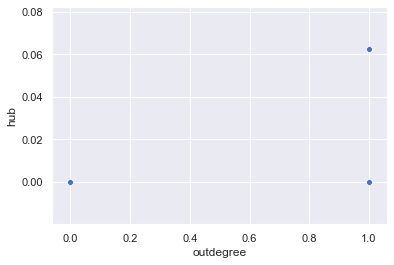

In [48]:
g1.scaplot_nodes('outdegree', 'hub')

In [53]:
with conn.cursor() as cursor:

    keys_movie = {}
    all_keys = []
    keys_used = []
    key_conn = []   #lista com a lista de conecções
    num_conn = []   #lista com numero de filmes iguais

    cursor.execute("SELECT id_filme, id_keyword FROM filme_keyword INNER JOIN filme_genero using (id_filme) WHERE id_genero = 28;")
    res = cursor.fetchall()

    for filme, key in res:
        if(key in keys_movie):
            keys_movie[key].append(filme)
        else:
            keys_movie[key] = [filme]
        if(key not in all_keys):
            all_keys.append(key)

    for key_value in range(len(all_keys)):
        for comparedk in range(key_value + 1, len(all_keys)):
            num_connections = 0

            if(all_keys[key_value] in keys_movie):
                for movie in keys_movie[all_keys[key_value]]:
                    if(all_keys[comparedk] in keys_movie):
                        if movie in keys_movie[all_keys[comparedk]]:
                            num_connections += 1

            if num_connections > 1:
                if (all_keys[key_value] not in keys_used):
                    keys_used.append(all_keys[key_value])
                if (all_keys[comparedk] not in keys_used):
                    keys_used.append(all_keys[comparedk])
                key_conn.append([all_keys[key_value], all_keys[comparedk]])
                num_conn.append(num_connections)

    #print(key_conn)

    #print(num_conn)

In [24]:
keys_movie

24389

In [13]:
for i in range(len(num_conn)):
    if num_conn[i]>1:
        print(i)

90
91
97
101
104
105
113
114
126
132
147
150
152
155
313
318
321
324
338
396
432
436
460
499
508
544
551
648
650
742
743
796
808
810
816
817
827
833
836
840
844
846
855
981
1087
1132
1155
1289
1367
1424
1426
1427
1437
1449
1451
1557
1571
1572
1602
1732
1776
1777
1781
1782
1799
1813
1819
1820
1822
2019
2021
2035
2046
2419
2420
2421
2422
2424
2433
2434
2443
2450
2458
2461
2463
2464
2465
2466
2468
2477
2478
2487
2494
2502
2505
2507
2508
2509
2511
2520
2521
2530
2537
2545
2548
2550
2551
2553
2562
2563
2572
2579
2587
2590
2592
2594
2603
2604
2613
2620
2628
2631
2633
2690
2692
2695
2696
2700
2711
2713
2714
2829
2830
2832
2834
2893
2942
2969
2973
2976
2977
3005
3023
3122
3179
3203
3255
3279
3376
3424
3432
3455
3662
3695
3697
3705
3708
3716
3718
3719
3723
3730
3731
3733
3739
3754
3756
3759
3777
3779
3780
3782
3788
3791
3819
3831
3834
3840
3842
3849
3855
3862
3865
3875
3886
3887
3891
3895
3908
3917
3936
3948
4000
4013
4018
4036
4059
4071
4072
4104
4105
4110
4115
4167
4221
4223
4243
4245
4247
42

In [15]:
key_conn[91]

[83, 483]

In [54]:
with open('onemode1.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 0\n')

        for i in keys_used:
            cursor.execute("SELECT nome FROM keyword WHERE id_keyword = %s", i)
            key_name = cursor.fetchone()
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i))
            file.write('    type "keyword"\n')
            file.write('    label "{}"\n'.format(unidecode(key_name[0])))
            file.write('  ]\n')

        for i in range(len(key_conn)):
            file.write('  edge [\n')
            file.write('    source "k_{}"\n'.format(key_conn[i][0]))
            file.write('    target "k_{}"\n'.format(key_conn[i][1]))
            file.write('  ]\n')

        file.write(']\n')

In [58]:
g2 = fm.load('onemode1.gml')
g2.set_all_nodes('labpos', 'hover')
g2.move('kamada_kawai')
g2.draw()